In [63]:
#Makemore implementation from Karphaty Tutorial
words = open('names.txt').read().splitlines()

In [64]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

Bygram Language model 

In [65]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2, in zip (chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        
    

In [66]:
sorted(b.items(), key = lambda kv: -kv[1])  ##This is uncomprehensible for me now right


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [67]:
import torch

In [68]:
N = torch.zeros ((27,27) , dtype = torch.int32)

In [69]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [70]:
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [71]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

        

In [72]:
itos = {i:s for s,i in stoi.items()}

In [73]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [74]:
 import matplotlib.pyplot as plt 
%matplotlib inline

# plt.figure(figsize = (16,16))
# plt.imshow(N, cmap='Blues')
# for i in range(27):
#     for j in range(27):
#         chstr = itos[i] + itos [j]
#         plt.text(j,i,chstr, ha="center", va="bottom", color='gray')
#         plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
# plt.axis('off');

In [75]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [76]:
p = N[0].float()
p  = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [77]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [78]:
# g = torch.Generator().manual_seed(250)
# p = torch.rand(3, generator=g)
# p  = p / p.sum()
# p

In [79]:
# torch.multinomial(p, num_samples=100, replacement=True, generator=g)
P = (N+1).float() 
P /= P.sum(1, keepdim=True) #keepdim is neccesary because Broadcasting rules

In [80]:
#This is a bigram model it seems. 
for i in range(3):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p/p.sum()
        
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))



sonde.
janasah.
p.


In [81]:
#loss function
log_likelihood = 0.0
n=0

for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logporb = torch.log(prob)
        log_likelihood += logporb 
        n +=1
        print(f'{ch1}{ch2}:{prob:.4f}{logporb:.4f}')
print(f'{log_likelihood=}')
nll = - log_likelihood
print (f'{nll=}')
print(f'{nll/n}')

.e:0.0478-3.0410
em:0.0377-3.2793
mm:0.0253-3.6753
ma:0.3885-0.9454
a.:0.1958-1.6305
.o:0.0123-4.3965
ol:0.0779-2.5526
li:0.1774-1.7293
iv:0.0152-4.1845
vi:0.3508-1.0476
ia:0.1380-1.9807
a.:0.1958-1.6305
.a:0.1376-1.9835
av:0.0246-3.7041
va:0.2473-1.3971
a.:0.1958-1.6305
log_likelihood=tensor(-38.8086)
nll=tensor(38.8086)
2.4255354404449463


In [82]:
 #neural networky
#create the Training set of bigrams. (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, in zip (chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [83]:
xs

tensor([ 0,  5, 13, 13,  1])

In [84]:
ys

tensor([ 5, 13, 13,  1,  0])

In [85]:
import torch.nn.functional as F
xenc =F.one_hot(xs, num_classes=27).float() #careful with data types

xenc.shape

torch.Size([5, 27])

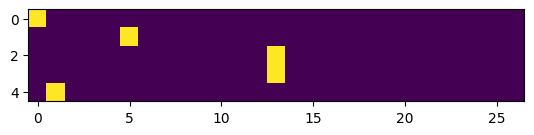

In [86]:
plt.imshow(xenc)

In [87]:
xenc.dtype

torch.float32

In [88]:
#First Neuron
W = torch.randn((27,27))
xenc @ W

tensor([[ 0.7618, -1.3965,  2.7426, -1.5328, -0.0895,  0.4577, -1.3606, -1.9470,
          0.4629, -0.9083, -1.2430, -0.5299,  0.9087,  2.4318, -1.3873,  1.6898,
          1.1681,  0.2606,  0.1042, -1.4815, -0.2470,  0.6511, -1.7463, -0.8340,
         -1.5111,  0.5517, -1.3038],
        [-1.1168,  0.8025,  0.7122, -0.9049, -0.3801, -1.2260, -1.7848, -0.6853,
          1.3508,  1.1850,  0.5188, -0.2472, -0.2603, -0.0531, -0.8817,  0.8295,
         -1.0731, -0.4020,  0.0301, -0.3955, -1.4388, -0.3031,  0.4870,  0.7293,
         -0.0256, -0.5180, -1.1757],
        [-0.0408,  0.1448, -0.0532,  1.4443, -1.0861,  1.2756, -0.6367, -0.0471,
          1.2352,  1.4573,  0.5481,  0.9911,  0.8964,  0.5989,  1.4398,  2.1224,
          0.2702,  1.1824, -0.4481, -1.4826, -0.4727, -1.4704, -2.0677, -0.3940,
         -1.1259,  1.0909, -0.9350],
        [-0.0408,  0.1448, -0.0532,  1.4443, -1.0861,  1.2756, -0.6367, -0.0471,
          1.2352,  1.4573,  0.5481,  0.9911,  0.8964,  0.5989,  1.4398,  2.1224

In [89]:
logits = xenc @ W #log Counts
counts = logits.exp() #equivalent to N (?)
probs = counts / counts.sum(1, keepdims=True)
probs #Actually a probability distro. Exponentiaded and Normalized T. 1h 20 min Karphatians Makemore
#something to paint Neural Netowrk structures as graphical would be *really helpful*


tensor([[0.0391, 0.0045, 0.2833, 0.0039, 0.0167, 0.0288, 0.0047, 0.0026, 0.0290,
         0.0074, 0.0053, 0.0107, 0.0453, 0.2076, 0.0046, 0.0989, 0.0587, 0.0237,
         0.0202, 0.0041, 0.0143, 0.0350, 0.0032, 0.0079, 0.0040, 0.0317, 0.0050],
        [0.0109, 0.0745, 0.0681, 0.0135, 0.0228, 0.0098, 0.0056, 0.0168, 0.1289,
         0.1092, 0.0561, 0.0261, 0.0257, 0.0317, 0.0138, 0.0766, 0.0114, 0.0223,
         0.0344, 0.0225, 0.0079, 0.0247, 0.0544, 0.0693, 0.0326, 0.0199, 0.0103],
        [0.0183, 0.0220, 0.0181, 0.0808, 0.0064, 0.0682, 0.0101, 0.0182, 0.0655,
         0.0818, 0.0330, 0.0513, 0.0467, 0.0347, 0.0804, 0.1591, 0.0250, 0.0621,
         0.0122, 0.0043, 0.0119, 0.0044, 0.0024, 0.0128, 0.0062, 0.0567, 0.0075],
        [0.0183, 0.0220, 0.0181, 0.0808, 0.0064, 0.0682, 0.0101, 0.0182, 0.0655,
         0.0818, 0.0330, 0.0513, 0.0467, 0.0347, 0.0804, 0.1591, 0.0250, 0.0621,
         0.0122, 0.0043, 0.0119, 0.0044, 0.0024, 0.0128, 0.0062, 0.0567, 0.0075],
        [0.0107, 0.0136,

In [90]:
#actually doing it
xenc = F.one_hot(xs, num_classes=27).float() #one hot encoding, call the float. Read the docs about one hot
logits = xenc @ W
counts = logits.exp() #counts, equivalent to N
probs = counts / counts.sum()   #This is a softmax. Takes outputs, exponentiates, divides by the sum, so you get a normal distro. 


In [91]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item() #input character index (read item)
    y = ys[i].item()
    print('-----------------------------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes{x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:',probs[i])
    print('label (actual next chracter):',y)
    p = probs[i, y]
    print('probability assigned by the net to the correct character:',p.item())
    logp = torch.log(p)
    print('log likelihood',logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i]=nll
print('===============')
print('average negative log likelihood, i.e. loss=',nlls.mean().item())

-----------------------------
bigram example 1: .e (indexes0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0090, 0.0010, 0.0653, 0.0009, 0.0038, 0.0066, 0.0011, 0.0006, 0.0067,
        0.0017, 0.0012, 0.0025, 0.0104, 0.0478, 0.0010, 0.0228, 0.0135, 0.0055,
        0.0047, 0.0010, 0.0033, 0.0081, 0.0007, 0.0018, 0.0009, 0.0073, 0.0011])
label (actual next chracter): 5
probability assigned by the net to the correct character: 0.00664217583835125
log likelihood -5.014315605163574
negative log likelihood: 5.014315605163574
-----------------------------
bigram example 2: em (indexes5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0014, 0.0094, 0.0086, 0.0017, 0.0029, 0.0012, 0.0007, 0.0021, 0.0162,
        0.0137, 0.0071, 0.0033, 0.0032, 0.0040, 0.0017, 0.0096, 0.0014, 0.0028,
        0.0043, 0.0028, 0.0010, 0.0031, 0.0068, 0.0087, 0.0041, 0.0025, 0.0013])
label (actual next chracter): 13
probability assigned by the net

In [96]:
g = torch.Generator().manual_seed(2147483647)
W =torch.randn((27,27), generator=g, requires_grad=True)

In [405]:
xenc = F.one_hot(xs, num_classes=27).float() #one hot encoding, call the float. Read the docs about one hot
logits = xenc @ W
counts = logits.exp() #counts, equivalent to N
probs = counts / counts.sum()   #This is a softmax. Takes outputs, exponentiates, divides by the sum, so you get a normal distro. 
loss = -probs[torch.arange(5), ys].log().mean()


In [406]:
print(loss.item())

4.162539482116699


In [407]:
#backward pass
W.grad = None #set gradient to zero
loss.backward() #pytorch is confusing as hell. 



In [408]:
W.data += -0.1 * W.grad

In [409]:
#actual full gradient descent


for k in range(10):
    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() #one hot encoding, call the float. Read the docs about one hot
    logits = xenc @ W
    counts = logits.exp() #counts, equivalent to N
    probs = counts / counts.sum()   #This is a softmax. Takes outputs, exponentiates, divides by the sum, so you get a normal distro. 
    loss = -probs[torch.arange(num), ys].log().mean()
    print(loss.item())

    #backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += 1 * W.grad


NameError: name 'num' is not defined